In [16]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import sympy as sp
from scipy.optimize import fsolve, bisect, newton, root_scalar

ImportError: cannot import name 'secant' from 'scipy.optimize' (/usr/local/lib/python3.11/dist-packages/scipy/optimize/__init__.py)

# Laboratorio 04: Raíces

---
### Profesor: Juan Marcos Marín
### Nombre: Laura Camila Rios Quintero
*Métodos computacionales 2024-II*

---

#1
¿Para que ángulo el area del segmento circular es igual a un cuarto del area de una circunferencia?

- Muestre que la expresión que permite resolver este problema será:


\begin{equation}
\theta - \sin \theta = \frac{\pi}{2}
\end{equation}


- Construya una grafica para $\theta$  ¿Alrededor de que punto esta solución?(Para este punto se recomienda emplear `dataframe`).

- Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobar la solución intuida del apartado anterior.

In [ ]:
f = lambda x: x - np.sin(x) - np.pi/2     #Función

x = np.linspace(0, 2*np.pi,1000)         # los angulos

plt.plot(x, f(x), label = 'F(x)= x - sin(x)-π/2')
plt.axhline(0, color = 'blue', linestyle= '--')
plt.xlabel('Ángulos (x) en radianes')
plt.ylabel('f(x)')
plt.grid(True)
plt.title("Gráfica de la función")
plt.legend()
plt.show()

In [ ]:
datos = pd.DataFrame({'Ángulos': x, 'f(x)' : f(x)})   # data frame con los datos de angulos evaluados en la función

tol =  0.1

cerca_cero = datos[np.abs(datos['f(x)'])<tol]    #filas cercanas a cero
print(cerca_cero)

'''
Según los datos y la grafica la raiz debe estar entre el ángulo 2 y 3 radianes

'''

In [ ]:
raiz_1 = bisect(f,2,3)    #Método bisección
raiz_2 = newton(f,2)   #Método newton
raiz_3 = fsolve(f,2)    #Método Punto fijo
raiz_4 = root_scalar(f, x0 = 2, method = 'secant')   # Método de la secante

print(f'La raiz por el método de Bisección será {raiz_1}')
print(f'La raiz por el método de Newton-Raphson será {raiz_2}')
print(f'La raiz por el método de fsolve será {raiz_3}')
print(f'La raiz por el método de la secante será {raiz_4}')

# 2

La ecuación de Kepler juega un papel importante en la mecánica celeste, ya que permite el calculo de la posición angular de objetos orbitantes. Para todas las órbitas elipticas, la ecuación

$$M = E- e\sin(E)$$

siendo $M$ la anomalía media, $E$ la anomalía excéntrica y $e$ la excentricidad ($e= \sqrt{1-b/a}$) (con $a>b$ los semiejes). Los astrónomos definen las "anomalías"  como posiciones angulares: la anomalía media $M$ es la posición angular del objeto en una órbita circular ficticia y, suponiendo una velocidad angular constante, puede relacionarse con el lapso de tiempo transcurrido desde el paso por el perihelio

$$M= \frac{2\pi}{T} (t-t_0)$$

donde $T$ es el periodo orbital y $t_0$ el tiempo cuando el objeto está en el perihelio.

Para el cometa Halley $e=0.9672671$, $T=75.96000$ años y $t_0=1986.1113$ años (Febrero 9 de 1986).

* Encuentre $E$ para el cometa Halley el 1 de abril de 1986. Para esto, haga una gráfica de

$$f(E) = E - e\sin(E) - M$$

para $E\in [0,1]$.

* Grafique $E=E(t)$ para todo un periodo de revolución y resuelva usando el método de Newton y secante

$$E-e\sin(E) - M(t) = 0$$

con un paso de $\Delta t = T/100$. $t_i = t_0 + (i)*\Delta t$, comenzando en $E(t_0) = 0$


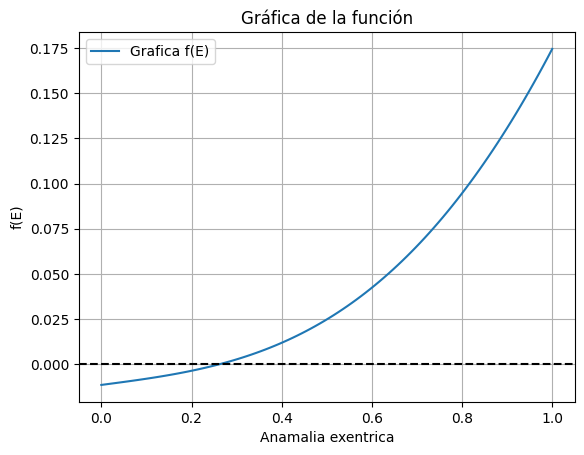

In [3]:
# Datos que nos dan
e=0.9672671         # excentricidad del cometa
T=75.96000
t0=1986.1113
t= 1986.2500  # La fecha que nos dan

'''
Ahora hay que hallar a M
con los datos que  nos dieron
'''
M = (2*np.pi*(t-t0))/T

f = lambda E : E - e*np.sin(E) - M

E = np.linspace(0,1,100)

plt.plot(E, f(E), label = 'Grafica f(E)')
plt.axhline(0, color = 'black', linestyle= '--')
plt.xlabel('Anamalia exentrica')
plt.ylabel('f(E)')
plt.grid(True)
plt.title("Gráfica de la función")
plt.legend()
plt.show()

#3
En la teoria de campo medio, la magnetización como función de la temperatura de un material magnético puede ser calculada como:

\begin{equation}
m(T) = \tanh\left( \frac{m(T)}{T} \right)
\end{equation}

donde $m$ y $T$ son la magnetizacion y temperatura reducida respectivamente


Para $T = 0.5$, determine:

* La magnetización reducida empleando el metodo de la secante y Newton-Raphson(Muestre su resultado con 4 cifras)

* Valide su respuestado con el metodo de punto fijo.
(Muestre su resultado con 4 cifras)

Ahora, defina `T = np.linspace(0.1,0.99,100)`, y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.

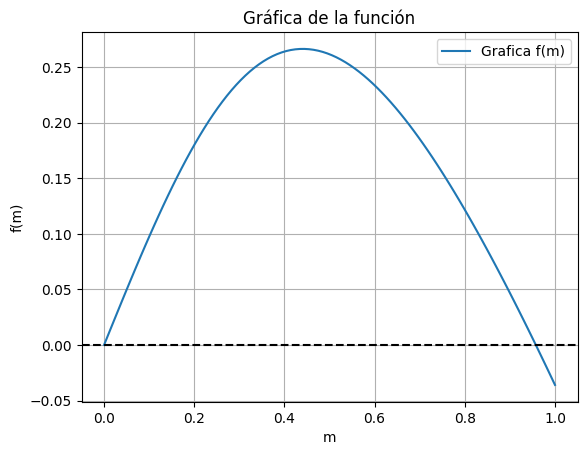

In [3]:
# Datos
T= 0.5
f = lambda m : np.tanh(m/T) - m

m = np.linspace(0,1,100)

plt.plot(m, f(m), label = 'Grafica f(m)')
plt.axhline(0, color = 'black', linestyle= '--')
plt.xlabel('m')
plt.ylabel('f(m)')
plt.grid(True)
plt.title("Gráfica de la función")
plt.legend()
plt.show()

In [13]:
magnetizacion_1 = newton(f,0.5)    # método newton
magnetizacion_2 = root_scalar(f, x0 = 0.5, method= 'secant')
raiz_sec = magnetizacion_2['root']       # Sola para tener el valor de la raíz

print(f'Magnetización con metodo de newton-Raphson{round(magnetizacion_1,4)}')
print(f'Magnetización con método de secante{round(raiz_sec,4)}')

Magnetización con metodo de newton-Raphson0.9575
Magnetización con método de secante0.9575


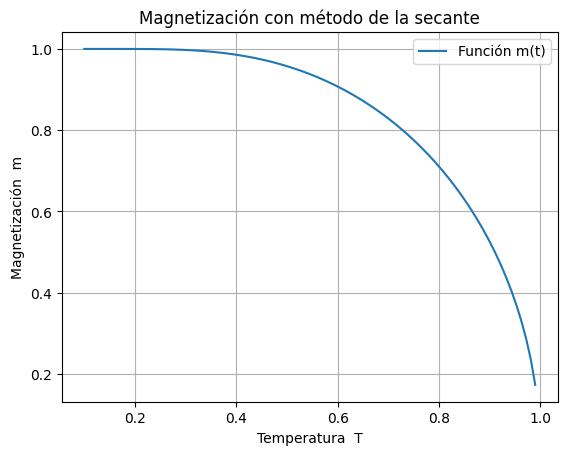

In [24]:


T = np.linspace(0.1,0.99,100)     # Valores de temperatura


def funcion(m,T):                       # magnetización en función del tiempo

    return np.tanh(m / T) - m

def secante(t):                             # Calcular m(t)
    root_= root_scalar(funcion, method='secant', x0=0.5,args=(t,) )
    Raíz = root_['root']
    return Raíz

valores_m = []                # Todos los valores de m

for i in T:
    valores_m.append(secante(i))


plt.plot(T, valores_m, label ='Función m(t)')
plt.xlabel('Temperatura  T')
plt.ylabel('Magnetización  m')
plt.title('Magnetización con método de la secante')
plt.legend()
plt.grid()
plt.show()